maximum(u_0) = 1.0


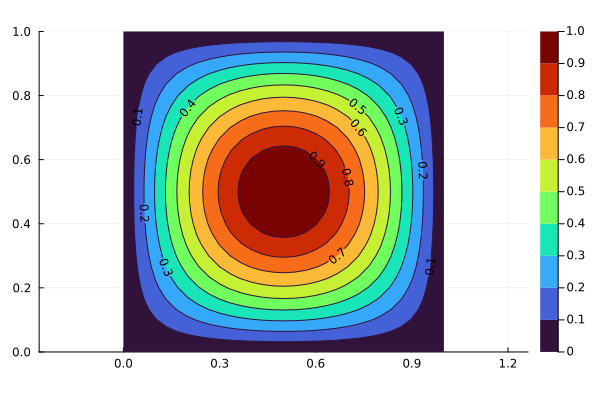

In [1]:
using Plots

# Our points x
n_1d = 31
function make_grid(x_0, x_f, y_0, y_f, n)
    # 1D spacing
    x_1d = LinRange(x_0, x_f, n)
    y_1d = LinRange(y_0, y_f, n)
    # and build coordinate pairs
    x = zeros(n * n, 2)
    for i in 1:n
        x[(i-1)*n+1 : i*n, 1]  = x_1d
        x[(i-1)*n+1 : i*n, 2] .= y_1d[i]
    end
    x_1d, y_1d, x
end
x_1d, y_1d, x = make_grid(0, 1, 0, 1, n_1d)

# An initial condition
u_0 = sin.(x[:, 1] * π) .* sin.(x[:, 2] * π)
@show maximum(u_0)

# And plot it
contourf(x_1d, y_1d, u_0, aspect_ratio=:equal, clabels=true, color=:turbo, levels=LinRange(0, 1, 11), colorbar_ticks=(0:11, LinRange(0, 1, 11)))

In [2]:
# Let's make a function that applies the matrix A on the interior of the plate
function diffusion_interior(u_0)
    u_next = zeros(size(u_0))
    h = 1 / n_1d # Note that I'm getting this from global space
    # Compute derivatives
    for j in 2:n_1d-1     # y
        for i in 2:n_1d-1 # x
            u_next[i + n_1d*(j - 1)] = (
                u_0[(i - 1) + n_1d*(j - 1)] +
                u_0[(i + 1) + n_1d*(j - 1)] +
                u_0[i + n_1d*(j - 2)] +
                u_0[i + n_1d*(j + 0)] -
                4 * u_0[i + n_1d*(j - 1)]
            ) / h^2
        end
    end
    u_next
end

display(diffusion_interior(u_0))

961-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [3]:
# Boundary conditions
function zero_boundaries(u_0, u_next)
    # Zero edges of plate
    for j in [1, n_1d]  # y
        for i in 1:n_1d # x
            u_next[i + n_1d*(j - 1)] = 0
        end
    end
    for j in 1:n_1d        # y
        for i in [1, n_1d] # x
            u_next[i + n_1d*(j - 1)] = 0
        end
    end
    u_next
end

# And join them together
function dF(u_0)
    u_next = diffusion_interior(u_0)
    zero_boundaries(u_0, u_next)
end

display(dF(u_0))

961-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

maximum(u_1) = 0.9999789421657956


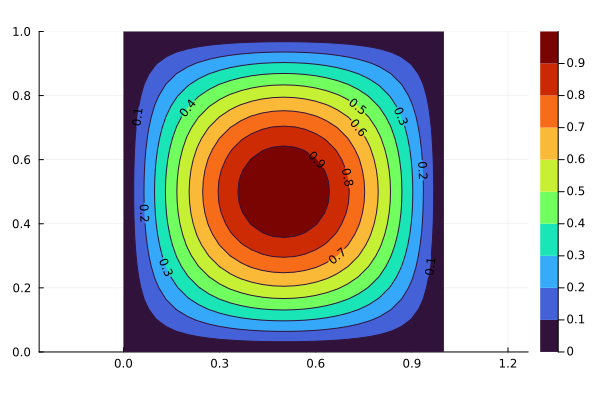

In [4]:
# Forward euler
function euler_forward(x, h, dF)
    return x + h * dF(x)
end

# And take a single step
h  = 1e-6
u_1 = euler_forward(u_0, h, dF)
@show maximum(u_1)

# And plot
contourf(x_1d, y_1d, u_1, aspect_ratio=:equal, clabels=true, color=:turbo, levels=LinRange(0, 1, 11), colorbar_ticks=(0:11, LinRange(0, 1, 11)))

maximum(u[end, :]) = 0.005169326243333146


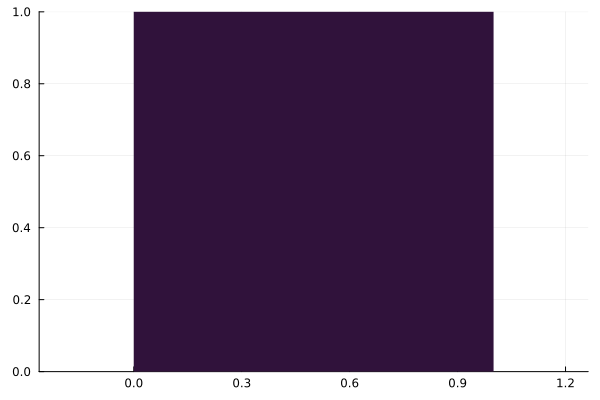

In [5]:
function run_simulation(u_0, h, dF, time_stepper, t_f)
    # Setup
    num_steps = Int(ceil(t_f / h))
    u = zeros((num_steps + 1, maximum(size(u_0))))
    u[1, :] = u_0

    # Simulate
    for i in 1:num_steps
        u[i + 1, :] = time_stepper(u[i, :], h, dF)
    end
    u
end

# And run it
h   = 1e-5
t_f = 0.25 # s
u   = run_simulation(u_0, h, dF, euler_forward, t_f)
@show maximum(u[end, :])

# Plotting the final u as a sanity check
contourf(x_1d, y_1d, u[end, :], aspect_ratio=:equal, clabels=true, color=:turbo, levels=LinRange(0, 1, 11), colorbar=:none)

In [6]:
# We wrap the plotting in an annotated loop
animation = @animate for i in 1:Int(ceil(t_f / h))
    contourf(x_1d, y_1d, u[i, :], aspect_ratio=:equal, clabels=true, color=:turbo, levels=LinRange(0, 1, 11), colorbar=:none)
end every 250;

[ Info: Saved animation to C:\Users\Andrew\Documents\Repositories\CSCI-3656-Interview-Read-Ahead\lgprojects-verywellmade\heat_plate_fixed.gif


Plots.AnimatedGif("C:\\Users\\Andrew\\Documents\\Repositories\\CSCI-3656-Interview-Read-Ahead\\lgprojects-verywellmade\\heat_plate_fixed.gif")
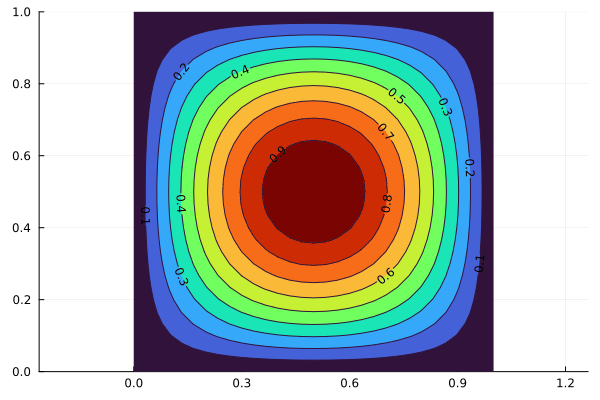

In [7]:
gif(animation, "heat_plate_fixed.gif", fps=30)

In [8]:
using Random

In [9]:
function make_random_triangle(n)
    triangle = Vector{Tuple{Int,Int}}(undef, 3)
    for i in 1:3
        triangle[i] = (rand(1:n), rand(1:n))
    end
    triangle 
end

function area(p1, p2, p3)
    return abs(p1[1] * (p2[2] - p3[2]) + p2[1] * (p3[2] - p1[2]) + p3[1] * (p1[2] - p2[2])) / 2
end

area (generic function with 1 method)

In [30]:
@show tri = make_random_triangle(n_1d)
println(area(tri[1], tri[2], tri[3]))

tri = make_random_triangle(n_1d) = [(1, 18), (21, 4), (23, 22)]
194.0


In [31]:
function get_conductivity(i, j, triangle)
    A = area(triangle[1], triangle[2], triangle[3])
    A1 = area((i,j), triangle[1], triangle[2])
    A2 = area((i,j), triangle[1], triangle[3])  
    A3 = area((i,j), triangle[2], triangle[3])  
    if (A == (A1 + A2 + A3))
        return 10
    else
        return 0.2
    end
end

function diffusion_interior_with_conductivity(u_0)
    u_next = zeros(size(u_0))
    h = 1 / n_1d
    
    for j in 2:n_1d-1
        for i in 2:n_1d-1
            k = get_conductivity(i, j, tri)
            
            u_next[i + n_1d*(j - 1)] = k * (
                u_0[(i - 1) + n_1d*(j - 1)] +
                u_0[(i + 1) + n_1d*(j - 1)] +
                u_0[i + n_1d*(j - 2)] +
                u_0[i + n_1d*(j + 0)] -
                4 * u_0[i + n_1d*(j - 1)]
            ) / h^2
        end
    end
    u_next
end

function dF(u_0)
    u_next = diffusion_interior_with_conductivity(u_0)
    zero_boundaries(u_0, u_next)
end

dF (generic function with 1 method)

In [32]:
u   = run_simulation(u_0, h, dF, euler_forward, t_f)
@show maximum(u[end, :])

maximum(u[end, :]) = 0.10850544982347678


0.10850544982347678

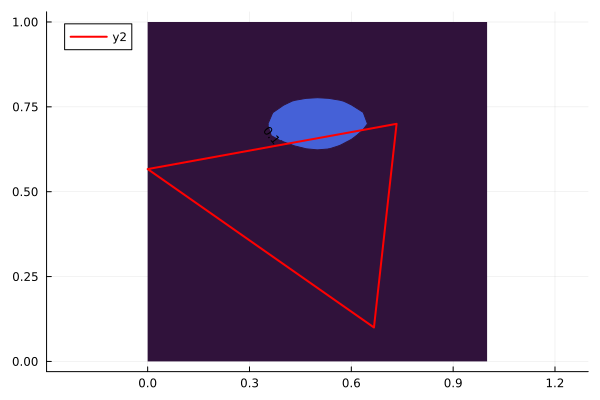

In [33]:
xs = [x_1d[i] for (i, j) in tri]
ys = [y_1d[j] for (i, j) in tri]
xs_closed = [xs; xs[1]]
ys_closed = [ys; ys[1]]

# Plotting the final u as a sanity check
contourf(x_1d, y_1d, u[end, :], aspect_ratio=:equal, clabels=true, color=:turbo, levels=LinRange(0, 1, 11), colorbar=:none)
plot!(xs_closed, ys_closed, lw = 2, linecolor = :red)

In [34]:
animation = @animate for i in 1:Int(ceil(t_f / h))
    contourf(x_1d, y_1d, u[i, :], aspect_ratio=:equal, clabels=true, color=:turbo, levels=LinRange(0, 1, 11), colorbar=:none)
    plot!(xs_closed, ys_closed, lw = 2, linecolor = :red)
end every 250;

[ Info: Saved animation to C:\Users\Andrew\Documents\Repositories\CSCI-3656-Interview-Read-Ahead\lgprojects-verywellmade\heat_plate_fixed2.gif


Plots.AnimatedGif("C:\\Users\\Andrew\\Documents\\Repositories\\CSCI-3656-Interview-Read-Ahead\\lgprojects-verywellmade\\heat_plate_fixed2.gif")
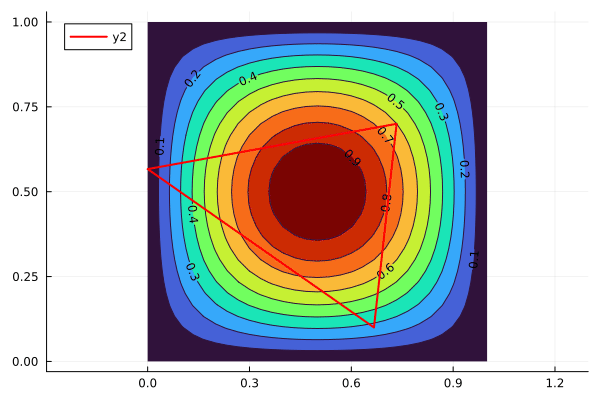

In [35]:
gif(animation, "heat_plate_fixed2.gif", fps=30)